In [1]:
import os
import cv2
import glob
import ntpath
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn import over_sampling
from keras.utils import np_utils 
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
from keras.metrics import categorical_accuracy, categorical_crossentropy
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, Concatenate, GlobalMaxPooling2D,concatenate
from keras.layers.advanced_activations import ReLU

warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
USE_DROPOUT = False
LEARN_RATE = 0.001
CROP_SIZE = 128
Height = 128
Weight = 128
Channel= 3

In [ ]:
# #################################################################################
# #数据平衡处理
# df_1 = df_train.loc[df_train["cancer_label"]==1]
# df_0 = df_train.loc[df_train["cancer_label"]==0]
# df_1_add1 = df_1.sample(379)
# df_1_add2 = df_1.sample(378)
# df_1 = pandas.concat([df_1,df_1_add1,df_1_add2])
# df_train = pandas.concat([df_1,df_0])

Train Biopsy Count:  266 , Holdout Biopsy Count:  30
Train Biopsy Count:  266 , Holdout Biopsy Count:  30
Mask Full Count:  296
Full Count:  82405
Train Nuclei Count:  73390
Full Count:  91564
Holdout Nuclei Count:  10160
train_samples_grade_0:  15124 , holdout_samples_grade_0:  2201
train_samples_grade_1:  15054 , holdout_samples_grade_1:  1690
train_samples_grade_2:  10426 , holdout_samples_grade_2:  1200
train_samples_grade_3:  24468 , holdout_samples_grade_3:  4306
train_samples_grade_4:  8318 , holdout_samples_grade_4:  763
Train Count:  73390 , Holdout Count:  10160
Train Sample_X:  122340 , Train Sample_Y:  122340
Train Count:  122340 , Holdout Count:  10160
Train Count:  122340 , Holdout Count:  10160
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
sample_image (InputLayer)              

Epoch 1/8
learnrate:  0.001  epoch:  0
7646/7646 [==============================] - 596s 78ms/step - loss: 0.1160 - categorical_accuracy: 0.9592 - categorical_crossentropy: 0.1160 - val_loss: 0.0375 - val_categorical_accuracy: 0.9854 - val_categorical_crossentropy: 0.0375

Epoch 00001: saving model to workdir/model_liver_CNN_1__e01-0.0375.hd5

Epoch 00001: val_loss improved from inf to 0.03747, saving model to workdir/model_liver_CNN_1__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
7646/7646 [==============================] - 584s 76ms/step - loss: 0.0342 - categorical_accuracy: 0.9885 - categorical_crossentropy: 0.0342 - val_loss: 0.0061 - val_categorical_accuracy: 0.9981 - val_categorical_crossentropy: 0.0061

Epoch 00002: saving model to workdir/model_liver_CNN_1__e02-0.0061.hd5

Epoch 00002: val_loss improved from 0.03747 to 0.00608, saving model to workdir/model_liver_CNN_1__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
7646/7646 [==============================] - 583s 76ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
8415/8415 [==============================] - 556s 66ms/step - loss: 0.1087 - categorical_accuracy: 0.9616 - categorical_crossentropy: 0.1087 - val_loss: 0.0442 - val_categorical_accuracy: 0.9840 - val_categorical_crossentropy: 0.0442

Epoch 00001: saving model to workdir/model_liver_CNN_2__e01-0.0442.hd5

Epoch 00001: val_loss improved from inf to 0.04417, saving model to workdir/model_liver_CNN_2__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8415/8415 [==============================] - 551s 65ms/step - loss: 0.0313 - categorical_accuracy: 0.9894 - categorical_crossentropy: 0.0313 - val_loss: 0.0299 - val_categorical_accuracy: 0.9889 - val_categorical_crossentropy: 0.0299

Epoch 00002: saving model to workdir/model_liver_CNN_2__e02-0.0299.hd5

Epoch 00002: val_loss improved from 0.04417 to 0.02991, saving model to workdir/model_liver_CNN_2__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
8415/8415 [==============================] - 551s 65ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
8002/8002 [==============================] - 563s 70ms/step - loss: 0.1068 - categorical_accuracy: 0.9625 - categorical_crossentropy: 0.1068 - val_loss: 0.1562 - val_categorical_accuracy: 0.9468 - val_categorical_crossentropy: 0.1562

Epoch 00001: saving model to workdir/model_liver_CNN_3__e01-0.1562.hd5

Epoch 00001: val_loss improved from inf to 0.15617, saving model to workdir/model_liver_CNN_3__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8002/8002 [==============================] - 559s 70ms/step - loss: 0.0311 - categorical_accuracy: 0.9895 - categorical_crossentropy: 0.0311 - val_loss: 0.0497 - val_categorical_accuracy: 0.9827 - val_categorical_crossentropy: 0.0497

Epoch 00002: saving model to workdir/model_liver_CNN_3__e02-0.0497.hd5

Epoch 00002: val_loss improved from 0.15617 to 0.04965, saving model to workdir/model_liver_CNN_3__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
8002/8002 [==============================] - 560s 70ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
8023/8023 [==============================] - 567s 71ms/step - loss: 0.1096 - categorical_accuracy: 0.9620 - categorical_crossentropy: 0.1096 - val_loss: 0.3359 - val_categorical_accuracy: 0.9410 - val_categorical_crossentropy: 0.3359

Epoch 00001: saving model to workdir/model_liver_CNN_4__e01-0.3359.hd5

Epoch 00001: val_loss improved from inf to 0.33588, saving model to workdir/model_liver_CNN_4__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8023/8023 [==============================] - 563s 70ms/step - loss: 0.0351 - categorical_accuracy: 0.9882 - categorical_crossentropy: 0.0351 - val_loss: 0.4392 - val_categorical_accuracy: 0.9382 - val_categorical_crossentropy: 0.4392

Epoch 00002: saving model to workdir/model_liver_CNN_4__e02-0.4392.hd5

Epoch 00002: val_loss did not improve from 0.33588
Epoch 3/8
learnrate:  0.001  epoch:  2
8023/8023 [==============================] - 564s 70ms/step - loss: 0.0232 - categorical_accuracy: 0.9918 - catego

Epoch 1/8
learnrate:  0.001  epoch:  0
8088/8088 [==============================] - 592s 73ms/step - loss: 0.1059 - categorical_accuracy: 0.9632 - categorical_crossentropy: 0.1059 - val_loss: 0.0729 - val_categorical_accuracy: 0.9746 - val_categorical_crossentropy: 0.0729

Epoch 00001: saving model to workdir/model_liver_CNN_5__e01-0.0729.hd5

Epoch 00001: val_loss improved from inf to 0.07291, saving model to workdir/model_liver_CNN_5__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8088/8088 [==============================] - 587s 73ms/step - loss: 0.0332 - categorical_accuracy: 0.9885 - categorical_crossentropy: 0.0332 - val_loss: 0.0435 - val_categorical_accuracy: 0.9843 - val_categorical_crossentropy: 0.0435

Epoch 00002: saving model to workdir/model_liver_CNN_5__e02-0.0435.hd5

Epoch 00002: val_loss improved from 0.07291 to 0.04350, saving model to workdir/model_liver_CNN_5__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
8088/8088 [==============================] - 587s 73ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
8110/8110 [==============================] - 579s 71ms/step - loss: 0.1098 - categorical_accuracy: 0.9619 - categorical_crossentropy: 0.1098 - val_loss: 0.0325 - val_categorical_accuracy: 0.9877 - val_categorical_crossentropy: 0.0325

Epoch 00001: saving model to workdir/model_liver_CNN_6__e01-0.0325.hd5

Epoch 00001: val_loss improved from inf to 0.03252, saving model to workdir/model_liver_CNN_6__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8110/8110 [==============================] - 575s 71ms/step - loss: 0.0317 - categorical_accuracy: 0.9892 - categorical_crossentropy: 0.0317 - val_loss: 0.0297 - val_categorical_accuracy: 0.9894 - val_categorical_crossentropy: 0.0297

Epoch 00002: saving model to workdir/model_liver_CNN_6__e02-0.0297.hd5

Epoch 00002: val_loss improved from 0.03252 to 0.02969, saving model to workdir/model_liver_CNN_6__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
8110/8110 [==============================] - 576s 71ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
7675/7675 [==============================] - 568s 74ms/step - loss: 0.1184 - categorical_accuracy: 0.9592 - categorical_crossentropy: 0.1184 - val_loss: 0.0345 - val_categorical_accuracy: 0.9889 - val_categorical_crossentropy: 0.0345

Epoch 00001: saving model to workdir/model_liver_CNN_7__e01-0.0345.hd5

Epoch 00001: val_loss improved from inf to 0.03449, saving model to workdir/model_liver_CNN_7__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
7675/7675 [==============================] - 565s 74ms/step - loss: 0.0349 - categorical_accuracy: 0.9882 - categorical_crossentropy: 0.0349 - val_loss: 0.0393 - val_categorical_accuracy: 0.9869 - val_categorical_crossentropy: 0.0393

Epoch 00002: saving model to workdir/model_liver_CNN_7__e02-0.0393.hd5

Epoch 00002: val_loss did not improve from 0.03449
Epoch 3/8
learnrate:  0.001  epoch:  2
7675/7675 [==============================] - 564s 74ms/step - loss: 0.0245 - categorical_accuracy: 0.9916 - catego

Epoch 1/8
learnrate:  0.001  epoch:  0
8124/8124 [==============================] - 582s 72ms/step - loss: 0.1151 - categorical_accuracy: 0.9597 - categorical_crossentropy: 0.1151 - val_loss: 0.0777 - val_categorical_accuracy: 0.9757 - val_categorical_crossentropy: 0.0777

Epoch 00001: saving model to workdir/model_liver_CNN_8__e01-0.0777.hd5

Epoch 00001: val_loss improved from inf to 0.07766, saving model to workdir/model_liver_CNN_8__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8124/8124 [==============================] - 579s 71ms/step - loss: 0.0324 - categorical_accuracy: 0.9888 - categorical_crossentropy: 0.0324 - val_loss: 0.0425 - val_categorical_accuracy: 0.9864 - val_categorical_crossentropy: 0.0425

Epoch 00002: saving model to workdir/model_liver_CNN_8__e02-0.0425.hd5

Epoch 00002: val_loss improved from 0.07766 to 0.04249, saving model to workdir/model_liver_CNN_8__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
8124/8124 [==============================] - 579s 71ms/st

Epoch 1/8
learnrate:  0.001  epoch:  0
8212/8212 [==============================] - 572s 70ms/step - loss: 0.1066 - categorical_accuracy: 0.9634 - categorical_crossentropy: 0.1066 - val_loss: 0.0865 - val_categorical_accuracy: 0.9674 - val_categorical_crossentropy: 0.0865

Epoch 00001: saving model to workdir/model_liver_CNN_9__e01-0.0865.hd5

Epoch 00001: val_loss improved from inf to 0.08655, saving model to workdir/model_liver_CNN_9__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
8212/8212 [==============================] - 568s 69ms/step - loss: 0.0317 - categorical_accuracy: 0.9889 - categorical_crossentropy: 0.0317 - val_loss: 0.0878 - val_categorical_accuracy: 0.9692 - val_categorical_crossentropy: 0.0878

Epoch 00002: saving model to workdir/model_liver_CNN_9__e02-0.0878.hd5

Epoch 00002: val_loss did not improve from 0.08655
Epoch 3/8
learnrate:  0.001  epoch:  2
8212/8212 [==============================] - 568s 69ms/step - loss: 0.0220 - categorical_accuracy: 0.9923 - catego

Epoch 1/8
learnrate:  0.001  epoch:  0
7266/7266 [==============================] - 616s 85ms/step - loss: 0.1260 - categorical_accuracy: 0.9565 - categorical_crossentropy: 0.1260 - val_loss: 0.0558 - val_categorical_accuracy: 0.9838 - val_categorical_crossentropy: 0.0558

Epoch 00001: saving model to workdir/model_liver_CNN_10__e01-0.0558.hd5

Epoch 00001: val_loss improved from inf to 0.05579, saving model to workdir/model_liver_CNN_10__best.hd5
Epoch 2/8
learnrate:  0.001  epoch:  1
7266/7266 [==============================] - 611s 84ms/step - loss: 0.0354 - categorical_accuracy: 0.9880 - categorical_crossentropy: 0.0354 - val_loss: 0.0133 - val_categorical_accuracy: 0.9957 - val_categorical_crossentropy: 0.0133

Epoch 00002: saving model to workdir/model_liver_CNN_10__e02-0.0133.hd5

Epoch 00002: val_loss improved from 0.05579 to 0.01334, saving model to workdir/model_liver_CNN_10__best.hd5
Epoch 3/8
learnrate:  0.001  epoch:  2
7266/7266 [==============================] - 610s 84m

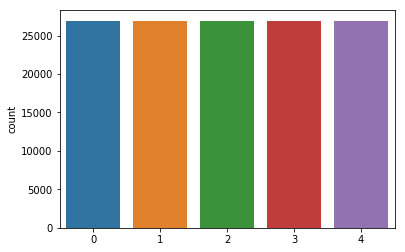

In [10]:
if __name__ == "__main__":
    
    if True:
            
        train(model_name="liver_CNN", load_weights_path=None)      
        

In [ ]:
 #截取到crop_size大小的cube
cube_image = cube_image[indent_z:indent_z + CROP_SIZE, indent_y:indent_y + CROP_SIZE, indent_x:indent_x + CROP_SIZE]
    
indent_x = random.randint(0, wiggle)
indent_y = random.randint(0, wiggle)

In [3]:
def train(model_name, load_weights_path):
    
    batch_size = 16

    for i in range(10):

        model_name_i =model_name + "_" + str(i+1)

        #获得训练和测试集合，以：路径、class label的形式保存
        train_files, holdout_files = get_train_holdout_files( current_iteration = (i+1) )

        #训练数据集
        train_gen = data_generator(batch_size, train_files, train_set=True)

        #测试数据集
        holdout_gen = data_generator(batch_size, holdout_files, train_set=False)

        #动态设置学习率
        learnrate_scheduler = LearningRateScheduler(step_decay)

        #获取model
        model = get_net(load_weight_path=load_weights_path)

        checkpoint = ModelCheckpoint("workdir/model_" + model_name_i + "_"  + "_e" + "{epoch:02d}-{val_loss:.4f}.hd5", monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

        checkpoint_best = ModelCheckpoint("workdir/model_" + model_name_i + "_"  + "_best.hd5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

        model.fit_generator(generator=train_gen, samples_per_epoch=int(len(train_files)/batch_size), nb_epoch=8, verbose=1, validation_data=holdout_gen, nb_val_samples=len(holdout_files), class_weight="auto", callbacks=[checkpoint, checkpoint_best, learnrate_scheduler])

        model.save("workdir/model_" + model_name_i + "_end.hd5")

In [4]:
def step_decay(epoch):
    res = 0.001
    if epoch > 100:
        res = 0.0001
    print("learnrate: ", res, " epoch: ", epoch)
    return res

In [5]:
def get_net(input_shape=(Height, Weight, Channel), load_weight_path=None) -> Model:  #期待返回类型为model
    
    inputs = Input(shape=input_shape, name="sample_image")
    inputs_mask = Input(shape=(128, 128, 3), name="mask_image")
    x = inputs
    x_mask = inputs_mask
    
    ##################################################################################################################
    x_ident_1 = x
    x_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_1)
    # 1st layer group
    x = Convolution2D(16, 3, 3, activation=None, border_mode='same', name='conv1a', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Convolution2D(16, 3, 3, activation=None, border_mode='same', name='conv1b', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool1')(x)
    x = Concatenate(axis=3)([x,x_ident_1])
    
    x_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_1)
    x_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x)
    # 2nd layer group
    x = Convolution2D(32, 3, 3, activation=None, border_mode='same', name='conv2a', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Convolution2D(32, 3, 3, activation=None, border_mode='same', name='conv2b', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool2')(x)
    x = Concatenate(axis=3)([x,x_ident_1,x_ident_2])

    x_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_1)
    x_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_2)
    x_ident_3 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x)
    # 3rd layer group
    x = Convolution2D(64, 3, 3, activation=None, border_mode='same', name='conv3a', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Convolution2D(64, 3, 3, activation=None, border_mode='same', name='conv3b', subsample=(1, 1))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool3')(x)
    x = Concatenate(axis=3)([x,x_ident_1,x_ident_2,x_ident_3])
     
    x_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_1)
    x_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_2)
    x_ident_3 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_ident_3)
    x_ident_4 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x)
    # 4th layer group
    x = Convolution2D(128, 3, 3, activation=None, border_mode='same', name='conv4a', subsample=(1, 1),)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Convolution2D(128, 3, 3, activation=None, border_mode='same', name='conv4b', subsample=(1, 1),)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool4')(x)
    x = Concatenate(axis=3)([x,x_ident_1,x_ident_2,x_ident_3,x_ident_4])
    
    x = GlobalMaxPooling2D()(x)
    x = BatchNormalization(name="final_features_344")(x)
    
    ##################################################################################################################
    x_mask_ident_1 = x_mask
    x_mask_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_1)
    # 1st layer group
    x_mask = Convolution2D(8, 3, 3, activation=None, border_mode='same', name='conv1_mask', subsample=(1, 1))(x_mask)
    x_mask = BatchNormalization()(x_mask)
    x_mask = ReLU()(x_mask)
    x_mask = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool1_mask')(x_mask)
    x_mask = Concatenate(axis=3)([x_mask,x_mask_ident_1])
    
    x_mask_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_1)
    x_mask_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask)
    # 2nd layer group
    x_mask = Convolution2D(16, 3, 3, activation=None, border_mode='same', name='conv2_mask', subsample=(1, 1))(x_mask)
    x_mask = BatchNormalization()(x_mask)
    x_mask = ReLU()(x_mask)
    x_mask = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool2_mask')(x_mask)
    x_mask = Concatenate(axis=3)([x_mask,x_mask_ident_1,x_mask_ident_2])

    x_mask_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_1)
    x_mask_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_2)
    x_mask_ident_3 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask)
    # 3rd layer group
    x_mask = Convolution2D(32, 3, 3, activation=None, border_mode='same', name='conv3_mask', subsample=(1, 1))(x_mask)
    x_mask = BatchNormalization()(x_mask)
    x_mask = ReLU()(x_mask)
    x_mask = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool3_mask')(x_mask)
    x_mask = Concatenate(axis=3)([x_mask,x_mask_ident_1,x_mask_ident_2,x_mask_ident_3])

#     x_mask_ident_1 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_1)
#     x_mask_ident_2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_2)
#     x_mask_ident_3 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask_ident_3)
#     x_mask_ident_4 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid')(x_mask)
#     # 4th layer group
#     x_mask = Convolution2D(128, 3, 3, activation=None, border_mode='same', name='conv4_mask', subsample=(1, 1),)(x_mask)
#     x_mask = BatchNormalization()(x_mask)
#     x_mask = ReLU()(x_mask)
#     x_mask = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid', name='pool4_mask')(x_mask)
#     x_mask = Concatenate(axis=3)([x_mask,x_mask_ident_1,x_mask_ident_2,x_mask_ident_3,x_mask_ident_4])

    x_mask = GlobalMaxPooling2D()(x_mask)
    x_mask = BatchNormalization(name="final_features_344_mask")(x_mask)
    
    ##################################################################################################################
    x = concatenate([x,x_mask])
    
    if USE_DROPOUT:
        x = Dropout(p=0.3)(x)
        
    x = Dense(64, activation='relu', name="final_features_64")(x)
    out_class = Dense(5, activation='softmax', name='out_class')(x)

    model = Model(input=[inputs,inputs_mask], output=out_class)
    
    if load_weight_path is not None:
        model.load_weights(load_weight_path, by_name=False)

    #编译模型
    model.compile(optimizer=SGD(lr=LEARN_RATE, momentum=0.9, nesterov=True), loss={ "out_class": "categorical_crossentropy" }, metrics={"out_class": [categorical_accuracy, categorical_crossentropy] } )
    model.summary(line_length=120)

    return model

In [6]:
get_net()

________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
sample_image (InputLayer)              (None, 128, 128, 3)        0                                                     
________________________________________________________________________________________________________________________
conv1a (Conv2D)                        (None, 128, 128, 16)       448           sample_image[0][0]                      
________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalizat (None, 128, 128, 16)       64            conv1a[0][0]                            
________________________________________________________________________________________________________________________
re_lu_1 (ReLU)                  

In [7]:
def data_generator(batch_size, record_list, train_set):
    
    while True:
        
        batch_index = 0
        image_list = []
        mask_list = []
        label_list = []

        if train_set:
            random.shuffle(record_list)

        #逐一遍历所有数据
        for index, record_item in enumerate(record_list):

            sample_path = record_item[0]
            mask_path = record_item[1]
            sample_label = record_item[2]

            #转换成多分类标签
            sample_label = np_utils.to_categorical(sample_label,5)  

            #读取图片、修改尺寸、标准化
            sample_image = cv2.imread(sample_path)
            sample_image = (sample_image - np.average(sample_image)) / np.std(sample_image)
            sample_image = sample_image.reshape(1, sample_image.shape[0], sample_image.shape[1], 3)
            
            #读取mask、修改尺寸、标准化
            mask_image = cv2.imread(mask_path)
            indent_x = random.randint(0, Height)
            indent_y = random.randint(0, Weight)       
            mask_image = mask_image[indent_x:indent_x + CROP_SIZE, indent_y:indent_y + CROP_SIZE]
            mask_image = (mask_image - np.average(mask_image)) / np.std(mask_image)
            mask_image = mask_image.reshape(1, mask_image.shape[0], mask_image.shape[1], 3)
            
            #数据增强
            if train_set:  
                if random.randint(0, 100) > 50:
                    sample_image = np.fliplr(sample_image)
                if random.randint(0, 100) > 50:
                    sample_image = np.flipud(sample_image)
                if random.randint(0, 100) > 50:
                    sample_image = sample_image[:,::-1]
                if random.randint(0, 100) > 50:
                    sample_image = sample_image[::-1, :]
                    
                if random.randint(0, 100) > 50:
                    mask_image = np.fliplr(mask_image)
                if random.randint(0, 100) > 50:
                    mask_image = np.flipud(mask_image)
                if random.randint(0, 100) > 50:
                    mask_image = mask_image[:,::-1]
                if random.randint(0, 100) > 50:
                    mask_image = mask_image[::-1, :]

            #添加数据
            image_list.append(sample_image)
            mask_list.append(mask_image)
            label_list.append(sample_label)
            batch_index += 1

            if batch_index >= batch_size:
                x_sample = np.vstack(image_list)
                x_mask = np.vstack(mask_list)
                y = np.vstack(label_list)
                yield {"sample_image":x_sample, "mask_image":x_mask}, y
                image_list = []
                mask_list = []
                label_list = []
                batch_index = 0
            

In [8]:
def get_train_holdout_files(current_iteration = 1):
    
    ###############################读取训练和测试的biopsy图像#####################################################
    src_dir = "/home/wanga/20190201/liver/Data_Description/" + str(current_iteration) +"/"

    train_biopsy_samples = pd.read_csv(src_dir + "train.csv")["file_path"].tolist()
    holdout_biopsy_samples = pd.read_csv(src_dir + "holdout.csv")["file_path"].tolist()
    print("Train Biopsy Count: ", len(train_biopsy_samples), ", Holdout Biopsy Count: ", len(holdout_biopsy_samples))

    train_biopsy_names = []
    for index, train_biopsy_sample in enumerate(train_biopsy_samples):

        train_biopsy_name = ntpath.basename(train_biopsy_sample)
        train_biopsy_names += [train_biopsy_name]

    holdout_biopsy_names = []
    for index, holdout_biopsy_sample in enumerate(holdout_biopsy_samples):

        holdout_biopsy_name = ntpath.basename(holdout_biopsy_sample)
        holdout_biopsy_names += [holdout_biopsy_name]

    print("Train Biopsy Count: ", len(train_biopsy_names), ", Holdout Biopsy Count: ", len(holdout_biopsy_names))
    
    ###############################读取biopsy_mask图像###########################################################
    src_dir = "/home/wanga/20190201/liver/Mask_Resized_256/"
    biopsy_masks = []

    for fold in os .listdir(src_dir):
        biopsy_masks = biopsy_masks + [file_path for file_path in glob.glob(src_dir+fold+"/*.jpg")]
        
    print("Mask Full Count: ",len(biopsy_masks))
    
    ###############################读取训练的nucleus图像#########################################################
    src_dir = "/home/wanga/20190201/liver/Image_Nuclei_Clustered_Specified_90_2/"

    nucleus_samples = []

    for fold_1 in os.listdir(src_dir):
 
       nucleus_samples = nucleus_samples + [file_path for file_path in glob.glob(src_dir+fold_1+"/1/*.jpg")]

    print("Full Count: ",len(nucleus_samples))

    train_nucleus_samples = []

    for index, nucleus_sample in enumerate(nucleus_samples):

        temp = ntpath.basename(nucleus_sample).split("_")[0:3]
        
        if (temp[0] + temp[1]) == "grade0":
            nucleus_sample_from = "ImageN" + "." + temp[2] + ".jpg"
        elif (temp[0] + temp[1]) == "grade1":
            nucleus_sample_from = "Image1" + "-" + temp[2] + ".jpg"
        elif (temp[0] + temp[1]) == "grade2":
            nucleus_sample_from = "Image2" + "-" + temp[2] + ".jpg"
        elif (temp[0] + temp[1]) == "grade3":
            nucleus_sample_from = "Image3" + "-" + temp[2] + ".jpg"
        elif (temp[0] + temp[1]) == "grade4":
            nucleus_sample_from = "Image4" + "-" + temp[2] + ".jpg"

        if nucleus_sample_from in train_biopsy_names:

            train_nucleus_samples += [nucleus_sample]

    print("Train Nuclei Count: ", len(train_nucleus_samples))
    
    ###############################读取测试的nucleus图像##########################################################
    src_dir = "/home/wanga/20190201/liver/Image_Nuclei/images/"

    nucleus_samples = []

    for fold_1 in os.listdir(src_dir):

        for fold_2 in os.listdir(src_dir+fold_1+"/"):

            nucleus_samples = nucleus_samples + [file_path for file_path in glob.glob(src_dir+fold_1+"/"+fold_2+"/*.jpg")]

    print("Full Count: ",len(nucleus_samples))
    
    holdout_nucleus_samples = []

    for index, nucleus_sample in enumerate(nucleus_samples):

        nucleus_sample_from = nucleus_sample.split(".jpg")[0].split("/")[-1]+".jpg"

        if nucleus_sample_from in holdout_biopsy_names:

            holdout_nucleus_samples += [nucleus_sample]

    print("Holdout Nuclei Count: ", len(holdout_nucleus_samples))
    
    ###################################获取样本标签###############################################################
    train_samples_grade_0 = []; holdout_samples_grade_0 = [];
    train_samples_grade_1 = []; holdout_samples_grade_1 = [];
    train_samples_grade_2 = []; holdout_samples_grade_2 = [];
    train_samples_grade_3 = []; holdout_samples_grade_3 = [];
    train_samples_grade_4 = []; holdout_samples_grade_4 = [];

    for index, train_nucleus_sample in enumerate(train_nucleus_samples):
        
        ########################获取mask########################
        temp = ntpath.basename(train_nucleus_sample).split("_")
        if temp[0]+temp[1] == "grade0":
            biopsy_mask_from = "ImageN."+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade1":
             biopsy_mask_from = "Image1-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade2":
             biopsy_mask_from = "Image2-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade3":
             biopsy_mask_from = "Image3-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade4":
             biopsy_mask_from = "Image4-"+temp[2]+".jpg"
        for biopsy_mask in biopsy_masks:
            if biopsy_mask_from in biopsy_mask:
                biopsy_mask_from = biopsy_mask
        ########################################################
        if "grade0" in train_nucleus_sample:
            train_samples_grade_0 += [ [train_nucleus_sample, biopsy_mask_from, 0] ]
        elif "grade1" in train_nucleus_sample:
            train_samples_grade_1 += [ [train_nucleus_sample, biopsy_mask_from, 1] ]
        elif "grade2" in train_nucleus_sample:
            train_samples_grade_2 += [ [train_nucleus_sample, biopsy_mask_from, 2] ]
        elif "grade3" in train_nucleus_sample:
            train_samples_grade_3 += [ [train_nucleus_sample, biopsy_mask_from, 3] ]
        elif "grade4" in train_nucleus_sample:
            train_samples_grade_4 += [ [train_nucleus_sample, biopsy_mask_from, 4] ]

    for index, holdout_nucleus_sample in enumerate(holdout_nucleus_samples):
        
        ########################获取mask########################
        temp = ntpath.basename(holdout_nucleus_sample).split("_")
        if temp[0]+temp[1] == "grade0":
            biopsy_mask_from = "ImageN."+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade1":
             biopsy_mask_from = "Image1-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade2":
             biopsy_mask_from = "Image2-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade3":
             biopsy_mask_from = "Image3-"+temp[2]+".jpg"
        elif temp[0]+temp[1] == "grade4":
             biopsy_mask_from = "Image4-"+temp[2]+".jpg"
        for biopsy_mask in biopsy_masks:
            if biopsy_mask_from in biopsy_mask:
                biopsy_mask_from = biopsy_mask
        ########################################################
        if "grade0" in holdout_nucleus_sample:
            holdout_samples_grade_0 += [ [holdout_nucleus_sample, biopsy_mask_from, 0] ]
        elif "grade1" in holdout_nucleus_sample:
            holdout_samples_grade_1 += [ [holdout_nucleus_sample, biopsy_mask_from, 1] ]
        elif "grade2" in holdout_nucleus_sample:
            holdout_samples_grade_2 += [ [holdout_nucleus_sample, biopsy_mask_from, 2] ]
        elif "grade3" in holdout_nucleus_sample:
            holdout_samples_grade_3 += [ [holdout_nucleus_sample, biopsy_mask_from, 3] ]
        elif "grade4" in holdout_nucleus_sample:
            holdout_samples_grade_4 += [ [holdout_nucleus_sample, biopsy_mask_from, 4] ]

    print("train_samples_grade_0: ", len(train_samples_grade_0), ", holdout_samples_grade_0: ", len(holdout_samples_grade_0))
    print("train_samples_grade_1: ", len(train_samples_grade_1), ", holdout_samples_grade_1: ", len(holdout_samples_grade_1))
    print("train_samples_grade_2: ", len(train_samples_grade_2), ", holdout_samples_grade_2: ", len(holdout_samples_grade_2))
    print("train_samples_grade_3: ", len(train_samples_grade_3), ", holdout_samples_grade_3: ", len(holdout_samples_grade_3))
    print("train_samples_grade_4: ", len(train_samples_grade_4), ", holdout_samples_grade_4: ", len(holdout_samples_grade_4))

    train_samples = train_samples_grade_0 + train_samples_grade_1 + train_samples_grade_2 + train_samples_grade_3 + train_samples_grade_4
    holdout_samples = holdout_samples_grade_0 + holdout_samples_grade_1 + holdout_samples_grade_2 + holdout_samples_grade_3 + holdout_samples_grade_4
    print("Train Count: ", len(train_samples), ", Holdout Count: ", len(holdout_samples))

    ##############################训练集数据平衡#################################################################
    train_samples_x = np.array(train_samples)[:,0:2]
    train_samples_y = np.array(train_samples)[:,2].reshape(-1,1)

    ros = over_sampling.RandomOverSampler(random_state=0)
    train_samples_x, train_samples_y = ros.fit_sample(train_samples_x, train_samples_y)
    print("Train Sample_X: ", len(train_samples_x), ", Train Sample_Y: ", len(train_samples_y))

    sns.countplot(train_samples_y)
    train_samples = np.hstack((train_samples_x, train_samples_y.reshape(-1,1))).tolist()

    print("Train Count: ", len(train_samples), ", Holdout Count: ", len(holdout_samples))
    random.shuffle(train_samples)
    random.shuffle(holdout_samples)
    print("Train Count: ", len(train_samples), ", Holdout Count: ", len(holdout_samples))

    return train_samples, holdout_samples

Train Biopsy Count:  266 , Holdout Biopsy Count:  30
Train Biopsy Count:  266 , Holdout Biopsy Count:  30
Mask Full Count:  296
Full Count:  82405
Train Nuclei Count:  73390
Full Count:  91564
Holdout Nuclei Count:  10160
train_samples_grade_0:  15124 , holdout_samples_grade_0:  2201
train_samples_grade_1:  15054 , holdout_samples_grade_1:  1690
train_samples_grade_2:  10426 , holdout_samples_grade_2:  1200
train_samples_grade_3:  24468 , holdout_samples_grade_3:  4306
train_samples_grade_4:  8318 , holdout_samples_grade_4:  763
Train Count:  73390 , Holdout Count:  10160
Train Sample_X:  122340 , Train Sample_Y:  122340
Train Count:  122340 , Holdout Count:  10160
Train Count:  122340 , Holdout Count:  10160


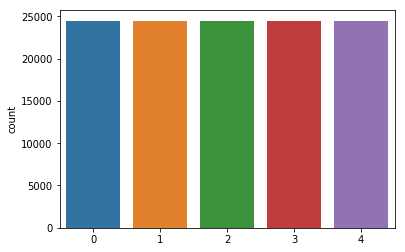

In [9]:
train_files, holdout_files = get_train_holdout_files()

In [17]:
len(holdout_files)

10160